<img src="//tiny.cc/devnetlogo" alt="Logo">
    
# Cisco Connect 2020 - DNA Center API Click-through Demo

Welcome to the DevNet click through demo. 



## Getting Started with Cisco DNA Center
<h2 id="platform-overview">Platform Overview</h2>
<p>Cisco DNA Center is at the heart of Cisco’s new era of networking, the intent-based network.</p>
<p>Cisco DNA Center supports the expression of business intent for network use cases, including base automation capabilities in an enterprise network. </p>
<p>The Analytics and Assurance features of Cisco DNA Center provide full context, end-to-end visibility into the network through data and insights.</p>
<img style="background-color:white" src="https://pubhub.devnetcloud.com/media/dnac-101/site/assets/images/dnac.png">



## Categories of API's

|Category|Description|
|---|---|
|Authentication|Authentication APIs provide an authorized token for accessing any REST API.|
|Know Your Network|Know your Network APIs can be used to discover details about clients, sites, topology and devices. It also provides programmatic REST APIs to add devices to the network and export device data|
|Site Management|Site Management APIs helps provision enterprise networks with zero touch deployment and manage the activation and distribution of software images in the network|
|Connectivity|Connectivity APIs provide the mechanism to configure and manage non-fabric wireless networks as a single step process|
|Operational Tasks|Operational tasks APIs provide programmatic access to DNA Center tasks such as configure and manage CLI templates, discover network devices, configure network settings and path trace through the network|
|Policy|Application Policy APIs allow you programmatic access to create policies that reflect your organization's business intent for a particular aspect of the network, such as network access|
|Event Management|Event management APIs provide the ability to receive custom notifications when specific events are triggered. This mechanism enables third party systems to take business actions in response to a particular event. Event subscriptions allow association of a notification method with an event|

Please feel free to browse through the toolkit on the other window to see a full list of API's available, and explore their functions. We'll go through some of them together below.


## 1. Authenticate to get access to DNAC - How to get a token

All Cisco DNA Center API calls are authenticated.  We need to have a valid token to be able to access these API. 
Here is a code snippet to show case how to get a valid token.

The credentials were already prepared for you in "dnac_config.py" file, it contains variables for the controller and the username and password, we just need to simply import the info.

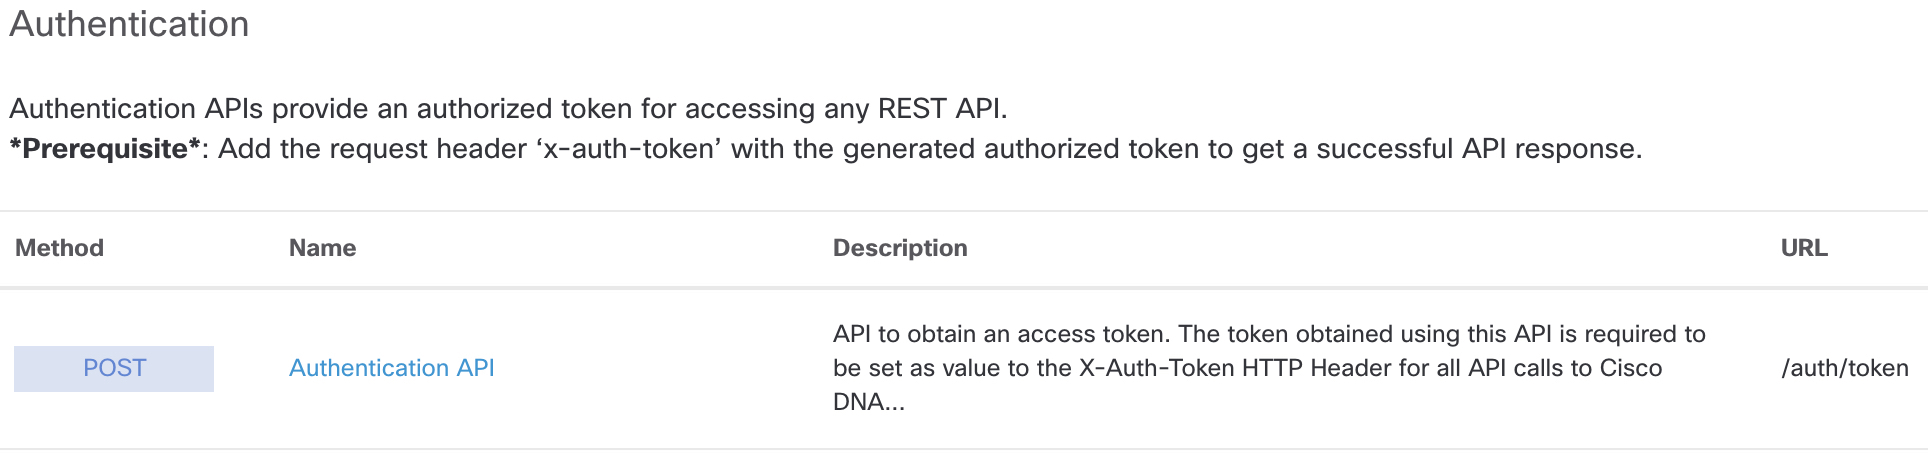

In [ ]:
### How to execute this code: Highlight this cell, then press "Shift+Return(Enter)"

from dnac_config import DNAC, DNAC_PORT, DNAC_USER, DNAC_PASSWORD                                   #Import the credentials and DNAC adddress from pre-configured file
import requests                                                                                     #Import module required to send request to DNAC
from requests.auth import HTTPBasicAuth                                                             #Import authentication module
from webex import sendWebExPOST                                                                     #Import WebEx function to post on Teams
requests.packages.urllib3.disable_warnings()
print ("Ready")

This imports the modules and information we need to connect and authenticate to DNAC, no output expected

In [ ]:
login_url = "https://{0}:{1}/api/system/v1/auth/token".format(DNAC, DNAC_PORT)                      #This is the url to aquire token
print (login_url)                                                                                   
result = requests.post(url=login_url, auth=HTTPBasicAuth(DNAC_USER, DNAC_PASSWORD), verify=False)
result.raise_for_status()
token = result.json()["Token"]

We have called the API "/api/system/v1/auth/token" to acquire the token, the actual URL we called is displayed above, now displaying the token itself in the next step

In [ ]:
print (token)                                                                                       #Print out the token to view

After running the line above, you should see the token displayed. Now we've authenticated and aquired the token, we can explore the other API's

---

## 2. API example - Getting a list of devices


In [ ]:
from __future__ import print_function                                                               #Import nessisary components
import sys
import json
#from util import get_url, deploy_and_wait, post_and_wait

We can query all network devices by calling the following API

In [ ]:
# First we package creating URL to a function
def create_url(path, controller_ip=DNAC):
    """ Helper function to create a DNAC API endpoint URL
    """

    if "dna/" in path:
        return "https://%s:%s/%s" % (controller_ip, DNAC_PORT, path)
    else:
        return "https://%s:%s/api/v1/%s" % (controller_ip, DNAC_PORT, path)

# Then we define a function that simplifies GET queries by calling create_url
def get_url(url,headers={}):

    url = create_url(path=url)
    print(url)
    headers['X-auth-token'] = token
    try:
        response = requests.get(url, headers=headers, verify=False)
    except requests.exceptions.RequestException as cerror:
        print("Error processing request", cerror)
        sys.exit(1)

    return response.json()


The following is raw output of the whole response from DNAC

In [ ]:
response = get_url("dna/intent/api/v1/network-device")                                              #Calling the API, and capture response
print(json.dumps(response, indent=2))                                                               #Printing the raw JSON content of the response

Above is the raw JSON format output from the API.

Now we take only management IP address and device name

In [ ]:
data = "\n".join([ "{}:\t{}".format(dev['managementIpAddress'],dev['platformId'])                   #Making the content easily readable
                  for dev in response['response']])

And display on the these data we need. After running the next line, you would see how easy it is now to read the output.

In [ ]:
print (data)                                                                                        #Print out the data, now easy to read
sendWebExPOST(data)                                                                                 #Bring up WebEx teams to see result there

In [ ]:
data = "\n".join([ "{}:\t{}".format(dev['macAddress'],dev['platformId'])                            #Now print MAC address with device name
                  for dev in response['response']])

In [ ]:
print (data)                                                                                        #Print out the data, now easy to read                                                                  #Import WebEx function to post on Teams
sendWebExPOST(data)                                                                                 #Bring up WebEx teams to see result there

---

## 3. Explore API's

When the Cisco DNA Center Platform discovers the network, it builds an inventory of network-devices, interfaces, and hosts. Those network-devices can have locations and tags.
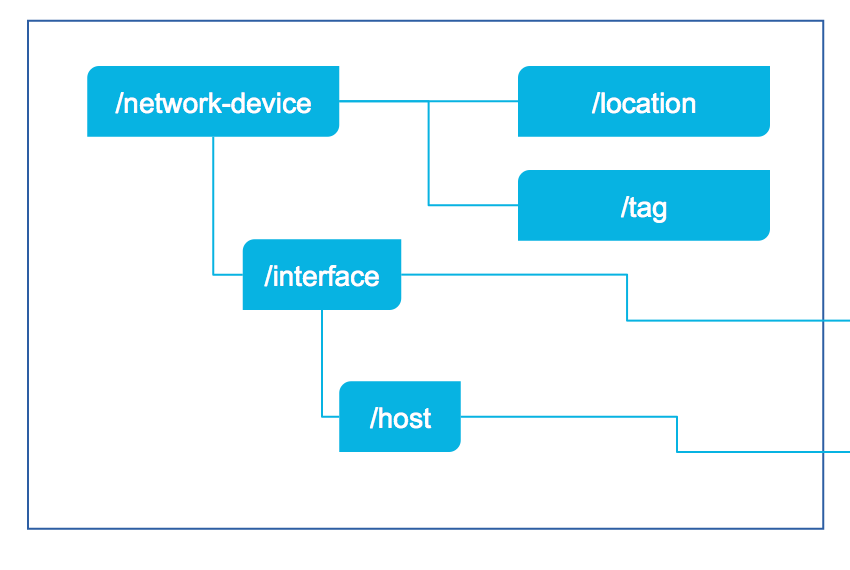

The following are the basic API that might help you be more productive when using the APIs on the Cisco DNA Center Platform

|API|Function|
|---|---|
|https://{}/api/system/v1/auth/token |Gets and encapsulates user identity and role information as a single value that RBAC-governed APIs use to make access-control decisions|
|https://{}/api/v1/network-device |Gets the list of first 500 network devices sorted lexicographically based on host name. It can be filtered using management IP address, mac address, hostname and location name|
|https://{}/api/v1/interface |Gets every interface on every network device. Whilst you can get a list of all interfaces via an API call, it is often more useful to get a subset of them. For example those that are attached to a specific network-device|
|https://{}/api/v1/host |You can use the host API to get the name of a host, the ID of the VLAN that the host uses, the IP address of the host, the MAC address of the host, the IP address of the network device to which host is connected, and more|
|https://{}/api/v1/flow-analysis |The path trace endpoint API to trace a path between two IP addresses. The function will wait for analysis to complete, and return the results|

Let's now try the interface API

In [ ]:
response = get_url("dna/intent/api/v1/interface")                                                   #Calling the API, and capture response
print(json.dumps(response, indent=2))                                                               #Printing the raw JSON content of the response

Notice that we got a lot of output here...how do we find what we need?

We need to be more specific on the query

In [ ]:
response = get_url("dna/intent/api/v1/interface/network-device/1cfd383a-7265-47fb-96b3-f069191a0ed5")                                                   #Calling the API, and capture response
print(json.dumps(response, indent=2))   

This is the interfaces of one device, a little better

You can also get interface directly by ID, like below

In [ ]:
response = get_url("dna/intent/api/v1/interface/3bac90be-f1d7-41b7-a368-d0bf8417123b")                 #Calling the API, and capture response
print(json.dumps(response, indent=2))  

A lot better. Being more specific with your query give more specific information.

Feel free to explore other functions like VLAN's and routing. And get ready for the MISSION.

---

### MISSION - Challenge for you! 

We know an IP address can you figure out which interface it's from?
Find the interface name, device name and display on WebEx Teams.

Note: You need to replace <font color=yellow>**<<[[MISSION]]>>**</font> with the correct answer.

---

In [ ]:
# Find where the IP is from

response = get_url("dna/intent/api/v1/<[[MISSION]]>"+"10.10.22.74")
print(json.dumps(response['response'], indent=2))

In [ ]:
# Extract the info and send to WebEx teams
data = <[[MISSION]]>
sendWebExPost("Device found for IP 10.10.22.74: ")
sendWebExPOST(data) 

# You can explore further by supplying both interface name and device name